EDA STEPS - 
1. LOADING DATA  PRE EXPLORATION
2. Understanding Data Structure
3. Handling Missing Values
4. Summary of statistics of the data. 
5. Data cleaning, formatting - Converting data types, Handling duplicates, Empty cells
6. Plot charts to vizualize.
7. Post EDA steps going into Feature Engg other Data related steps.

 

Load the dataset: Use functions like pd.read_csv() or specific loaders (load_titanic_data(), load_housing_data()).

Check dimensions: Get rows and columns using .shape.

Display first/last rows: Preview data using .head() and .tail().

Get column names & data types: Use .columns, .dtypes, or .info().

Check for missing values: Count NaNs per column using .isnull().sum().

Handle missing values: Apply strategies like .dropna() or .fillna().

Check for duplicates: Count duplicate rows using .duplicated().sum().

Handle duplicates: Remove duplicates using .drop_duplicates().

Get summary statistics: Use .describe() for numerical/categorical data and .nunique() for unique counts.

Detect outliers: Visualize using sns.boxplot().

Handle outliers: Apply methods like the IQR rule.

Visualize data: Create plots like histograms (.hist()), pair plots (sns.pairplot()), and heatmaps (sns.heatmap()).

Subset data: Select rows/columns using indexing ([], .loc, .iloc), conditions, or methods like .select_dtypes(), .filter().

Analyze categorical variables: Identify them (.select_dtypes()) and examine unique values (.unique()).

(Preprocessing Steps Shown):
Scale features (StandardScaler, MinMaxScaler).

Engineer new features (e.g., calculations, date extraction with).

Split dataset (train_test_split)



In [2]:
### **1. Load Libraries & Dataset**

 
import numpy as np                # Numerical operations
import matplotlib.pyplot as plt   # Basic visualizations
import seaborn as sns             # Statistical plots

# Load dataset
import pandas as pd  # for reading, processing, and analyzing structured data like excel tabulated data
import os            # to handle files, file exists, create folders, and manage files

# Titanic dataset URL
TITANIC_URL = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
FILE_NAME = "titanic.csv"
# housing_data

def load_housing_data():
    from sklearn.datasets import fetch_california_housing
    data = fetch_california_housing(as_frame=True)
    df = data.frame
    
    #print(df.head())
    return df

def load_titanic_data():
    # Check if file exists locally
    if os.path.exists(FILE_NAME):
        print("📂 Loading Titanic data from local file...")
    else:
        print("Downloading Titanic dataset...")
        df = pd.read_csv(TITANIC_URL)
        df.to_csv(FILE_NAME, index=False)
        print(" Titanic dataset saved as 'titanic.csv'")
    
    # Load the dataset into a DataFrame
    df = pd.read_csv(FILE_NAME)
    print("Data loaded successfully!")
    return df

# Load Titanic dataset
df = load_titanic_data()

# Load Housing Data 
#df = load_housing_data()

# Try loading stock market data from yahoofinance or elsewhere.


# Display first few rows

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)       # Adjust width to prevent wrapping
print(df.head())


📂 Loading Titanic data from local file...
Data loaded successfully!
   PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.2833   C85        C
2            3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.1000  C123        S
4            5         0       3                           Allen, Mr. William Henry    male  35.0      0      0            373450   8.0500   NaN        S


In [3]:
df2=df.copy(deep=True) # making a full copy with new memory...

In [33]:
df=df2  # just for convinience in using df each time. 

### **2. Understand the Dataset**

#df.head(5)   # try other number of rows for the first n rows.

# Check the last few rows / from the bottom
#df.tail(5)  # try (15)

# Check dataset shape of how many rows, columns
print("Shape " , df.shape, "\n")
 
# What are the Column names
print("Columns " , df.columns, "\n")

# Data types of each column
print("Dtypes ...Is it object , integer, float ...\n" , df.dtypes,"\n")
 
### **3. Handling Missing Values**
# Check for missing values
howmanyMissing =df.isnull().sum()
print("Checks for the existence of at least one missing value in a row..> ", howmanyMissing,"\n")

# Calculatethe  percetage of data will i loose, if i remove the rows having missing values

total_rows_before = df.shape[0]
rows_with_na = df.isnull().any(axis=1).sum()


percentage_affected = (rows_with_na / total_rows_before) * 100
print("Total rows with na > ", rows_with_na)
print(f"Percentage of Rows Affected: {percentage_affected:.2f}%")

#Excercise - Check what these do 
df.isnull().sum()                  # Summary: Counts null cells in each column of the DataFrame.
df.isnull().any(axis=1).sum()      # Summary: Counts rows with at least one null value in DataFrame.
df.isnull().sum().sum()            # Summary: Totals null cells across all columns (axis default ) in the DataFrame. uses bool
df.isnull().values.sum()           #Summary: Counts total null values in entire DataFrame,uses numpy.
df.isnull().sum(axis=1).sum()      #Summary: Sums null cells per row, totaling for entire DataFrame.


# Drop missing values
df.dropna(inplace=True) # if there are null values in a row, that row will be dropped.
print("\n If there was any NA , those would be dropped")

# or you can keep the rows by replacing the empty columns with values computed. 
# Impute - Fill missing values (Example: with mean for numerical data)
if(rows_with_na > 0):
    df.fillna(df.mean(), inplace=True)
else:
    print("None of the rows have been imputed")


Shape  (183, 12) 

Columns  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype='object') 

Dtypes ...Is it object , integer, float ...
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object 

Checks for the existence of at least one missing value in a row..>  PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64 

Total rows with na >  0
Percentage of Rows Affected: 0.00%

 If there was any NA , those would be dropped
None of the rows have been imputed


In [45]:
### **4. Summary Statistics**
df=df2 #for convinience 
 
# Descriptive statistics for numerical columns
print("Describe by default only describes numeric columns > \n ", df.describe())
# so The 25% percentile (Q1) is the median of the lower half of the sorted data (from the minimum to the 50% percentile). 
# 75% is median between 50% and 100%

Describe by default only describes numeric columns > 
         PassengerId    Survived      Pclass         Age       SibSp       Parch        Fare
count   183.000000  183.000000  183.000000  183.000000  183.000000  183.000000  183.000000
mean    455.366120    0.672131    1.191257   35.674426    0.464481    0.475410   78.682469
std     247.052476    0.470725    0.515187   15.643866    0.644159    0.754617   76.347843
min       2.000000    0.000000    1.000000    0.920000    0.000000    0.000000    0.000000
25%     263.500000    0.000000    1.000000   24.000000    0.000000    0.000000   29.700000
50%     457.000000    1.000000    1.000000   36.000000    0.000000    0.000000   57.000000
75%     676.000000    1.000000    1.000000   47.500000    1.000000    1.000000   90.000000
max     890.000000    1.000000    3.000000   80.000000    3.000000    4.000000  512.329200


In [46]:
# Descriptive statistics for categorical columns
print("-*" * 35) 
print("Count : No of categorical columns found in the dataset.")
try:
    print(df.describe(include=['O']))  # If no categorical columns exist, it will raise a ValueError.
except ValueError:
    print("Error: No categorical columns found in the dataset.")


 

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Count : No of categorical columns found in the dataset.
                                                     Name   Sex  Ticket Cabin Embarked
count                                                 183   183     183   183      183
unique                                                183     2     127   133        3
top     Cumings, Mrs. John Bradley (Florence Briggs Th...  male  113760    G6        S
freq                                                    1    95       4     4      116


In [51]:
# similarly try these. To view different types of columns. 

print(df.describe(include=[np.number]))         # Numeric (integers, floats)
#print(df.describe(include=[np.float64, np.float32]))  # Float
#print(df.describe(include=[np.bool_]))          # Bool
#print(df.describe(include=['O']))               # Object (strings, mixed types)
#print(df.describe(include=['category']))        # Category  df['A'] = df['A'].astype('category')
#print(df.describe(include=[np.datetime64]))     # Datetime
#print(df.describe(include='all'))               # All columns

                                                     Name   Sex  Ticket Cabin Embarked
count                                                 183   183     183   183      183
unique                                                183     2     127   133        3
top     Cumings, Mrs. John Bradley (Florence Briggs Th...  male  113760    G6        S
freq                                                    1    95       4     4      116


In [53]:
# Lets see how many unique values are there. For eg if its Yes No type, you will have just 2 unique in the column. If it is salaries, it will be many.
# each differing by at least a unit of 1.
print("-*" * 35) 
print("How many unique values were found in the Column > \n", df.nunique()   )              # Count unique values per column


-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
How many unique values were found in the Column > 
 PassengerId    183
Survived         2
Pclass           3
Name           183
Sex              2
Age             63
SibSp            4
Parch            4
Ticket         127
Fare            93
Cabin          133
Embarked         3
dtype: int64


In [62]:

# ok now that you know some columns have more unique values ,  you can take a look at that column value or 
#set of columns to gain understanding.
df.head(10) # is always the easiest.

df.query("index >= 1 and index <= 10")  # you can use ColName in place of index
 
df[(df.index >= 11) & (df.index <= 31)]   # you can use df["ColName"] as you can see syntax will be hard to read...
 
#alternate function call to gather info about data columns...





,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.55,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.00,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.50,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S


In [63]:
object_col_names = df.select_dtypes(include=['float64']).columns.tolist()
print(object_col_names)

print(df["Age"].dtype)   # it may say object and you want to know what type of object is in it
print(type(df["Age"].iloc[0]))  # this should give you that answer

print(">>>>>>")
print(df[object_col_names])

['Age', 'Fare']
float64
<class 'numpy.float64'>
>>>>>>
      Age     Fare
1    38.0  71.2833
3    35.0  53.1000
6    54.0  51.8625
10    4.0  16.7000
11   58.0  26.5500
..    ...      ...
871  47.0  52.5542
872  33.0   5.0000
879  56.0  83.1583
887  19.0  30.0000
889  26.0  30.0000

[183 rows x 2 columns]


In [65]:
### **5. Check for Duplicates**
# Find duplicate rows
howManyDuplicates = df.duplicated().sum()
print("howManyDuplicates >> ",howManyDuplicates)
# Remove duplicate rows

if howManyDuplicates > 0 :  # rows that are duplicates
    df.drop_duplicates(inplace=True)
else:
    print("There are no duplicates ...")


howManyDuplicates >>  0
There are no duplicates ...


In [73]:
df= df2
### **6. Handle Outliers**
# Box plot to detect outliers
#print(df.head(5))
if 'Fare' in df.columns:
    print(sns.boxplot(x=df['Fare']))  # df2 holds orginal unfiltered data
else:
    print("Choose from these columns to plot, \n " , df.columns)
print(">>>>")



# ADDITIONAL FUNCTION 


Choose from these columns to plot,  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype='object')
>>>>


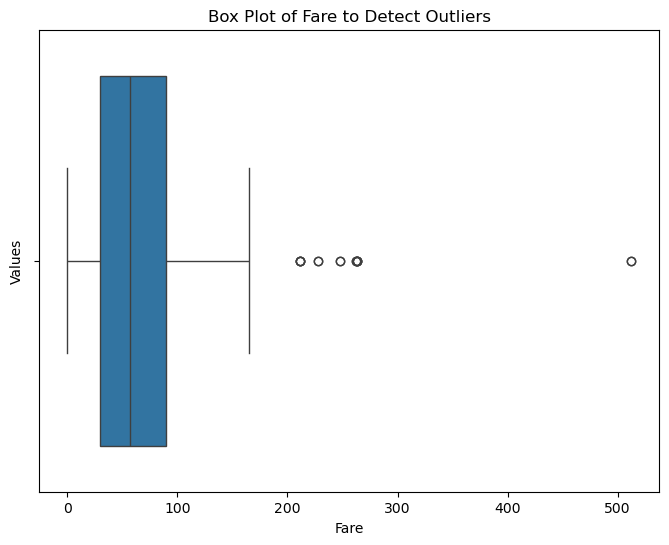

  Outlier values (16): [263.0, 263.0, 247.52, 247.52, 262.38, 263.0, 211.5, 263.0, 512.33, 211.34, 227.52, 227.52, 211.34, 512.33, 262.38, 211.34]

Outlier handling for Fare:
  Q1: 29.70, Q3: 90.00, IQR: 60.30
  Lower bound: -60.75, Upper bound: 180.45
Original DataFrame size: (183, 12)
DataFrame size after removing outliers: (167, 12)
>>>>


In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_and_handle_outliers(df, colName):
    # Check if the column exists
    if colName not in df.columns:
        print(f"Error: '{colName}' column not found. Choose from these columns: {list(df.columns)}")
        return df
    
    # Check if the column is numeric
    if not pd.api.types.is_numeric_dtype(df[colName]):
        print(f"Error: '{colName}' is not numeric. Please choose a numeric column.")
        return df
    
    # Create a box plot to visualize outliers
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[colName])
    plt.title(f'Box Plot of {colName} to Detect Outliers')
    plt.xlabel(colName)
    plt.ylabel('Values')
    plt.show()
    
    # Handle outliers using IQR method
    Q1 = df[colName].quantile(0.25)
    Q3 = df[colName].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
    outliers = df[(df[colName] < lower_bound) | (df[colName] > upper_bound)][colName]

    if not outliers.empty:
        print(f"  Outlier values ({len(outliers)}): {list(outliers.round(2))}")
    else:
        print("  No outliers found.")

    # Filter out outliers
    df_no_outliers = df[(df[colName] >= lower_bound) & (df[colName] <= upper_bound)]
    
    # Print outlier statistics
    print(f"\nOutlier handling for {colName}:")
    print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
    print(f"Original DataFrame size: {df.shape}")
    print(f"DataFrame size after removing outliers: {df_no_outliers.shape}")
    
    return df_no_outliers

# Example usage
# Assuming df2 is the original DataFrame
df = df2  # Copy the original DataFrame

# Specify the column to analyze
colName = 'Fare'  # Modify as needed

# Call the function
df_no_outliers = plot_and_handle_outliers(df, colName)

print(">>>>")

Axes(0.125,0.11;0.775x0.77)


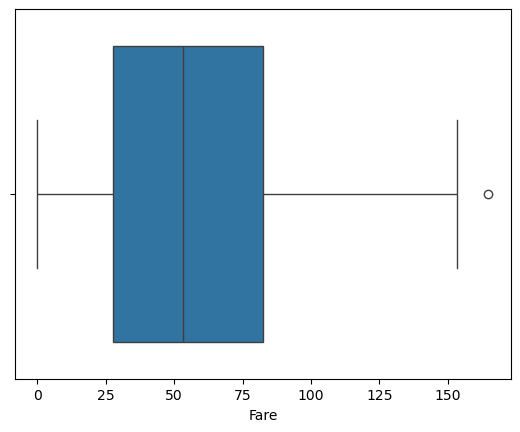

In [79]:
df=df2
colName = 'Fare'

# Remove outliers using IQR method
Q1 = df[colName].quantile(0.25)
Q3 = df[colName].quantile(0.75)
IQR = Q3 - Q1
df = df[(df[colName] >= (Q1 - 1.5 * IQR)) & (df[colName] <= (Q3 + 1.5 * IQR))]
print(sns.boxplot(x=df[colName]))  # df has the updated filtered data


[[<Axes: title={'center': 'PassengerId'}>
  <Axes: title={'center': 'Survived'}> <Axes: title={'center': 'Pclass'}>]
 [<Axes: title={'center': 'Age'}> <Axes: title={'center': 'SibSp'}>
  <Axes: title={'center': 'Parch'}>]
 [<Axes: title={'center': 'Fare'}> <Axes: > <Axes: >]]


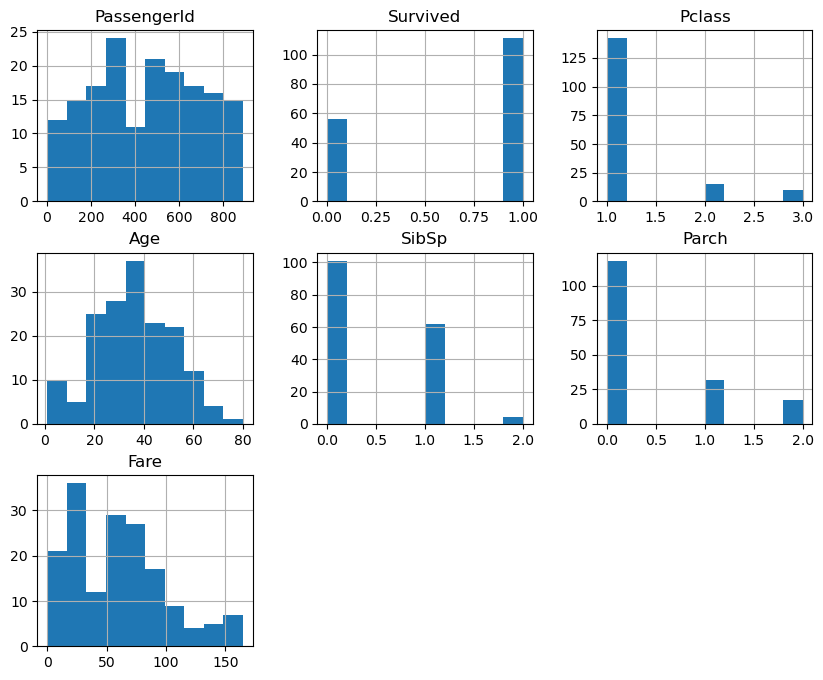

In [80]:
### **7. Data Visualization**
# Histogram
print(df.hist(figsize=(10, 8)))
plt.show()  

<Figure size 1000x600 with 0 Axes>

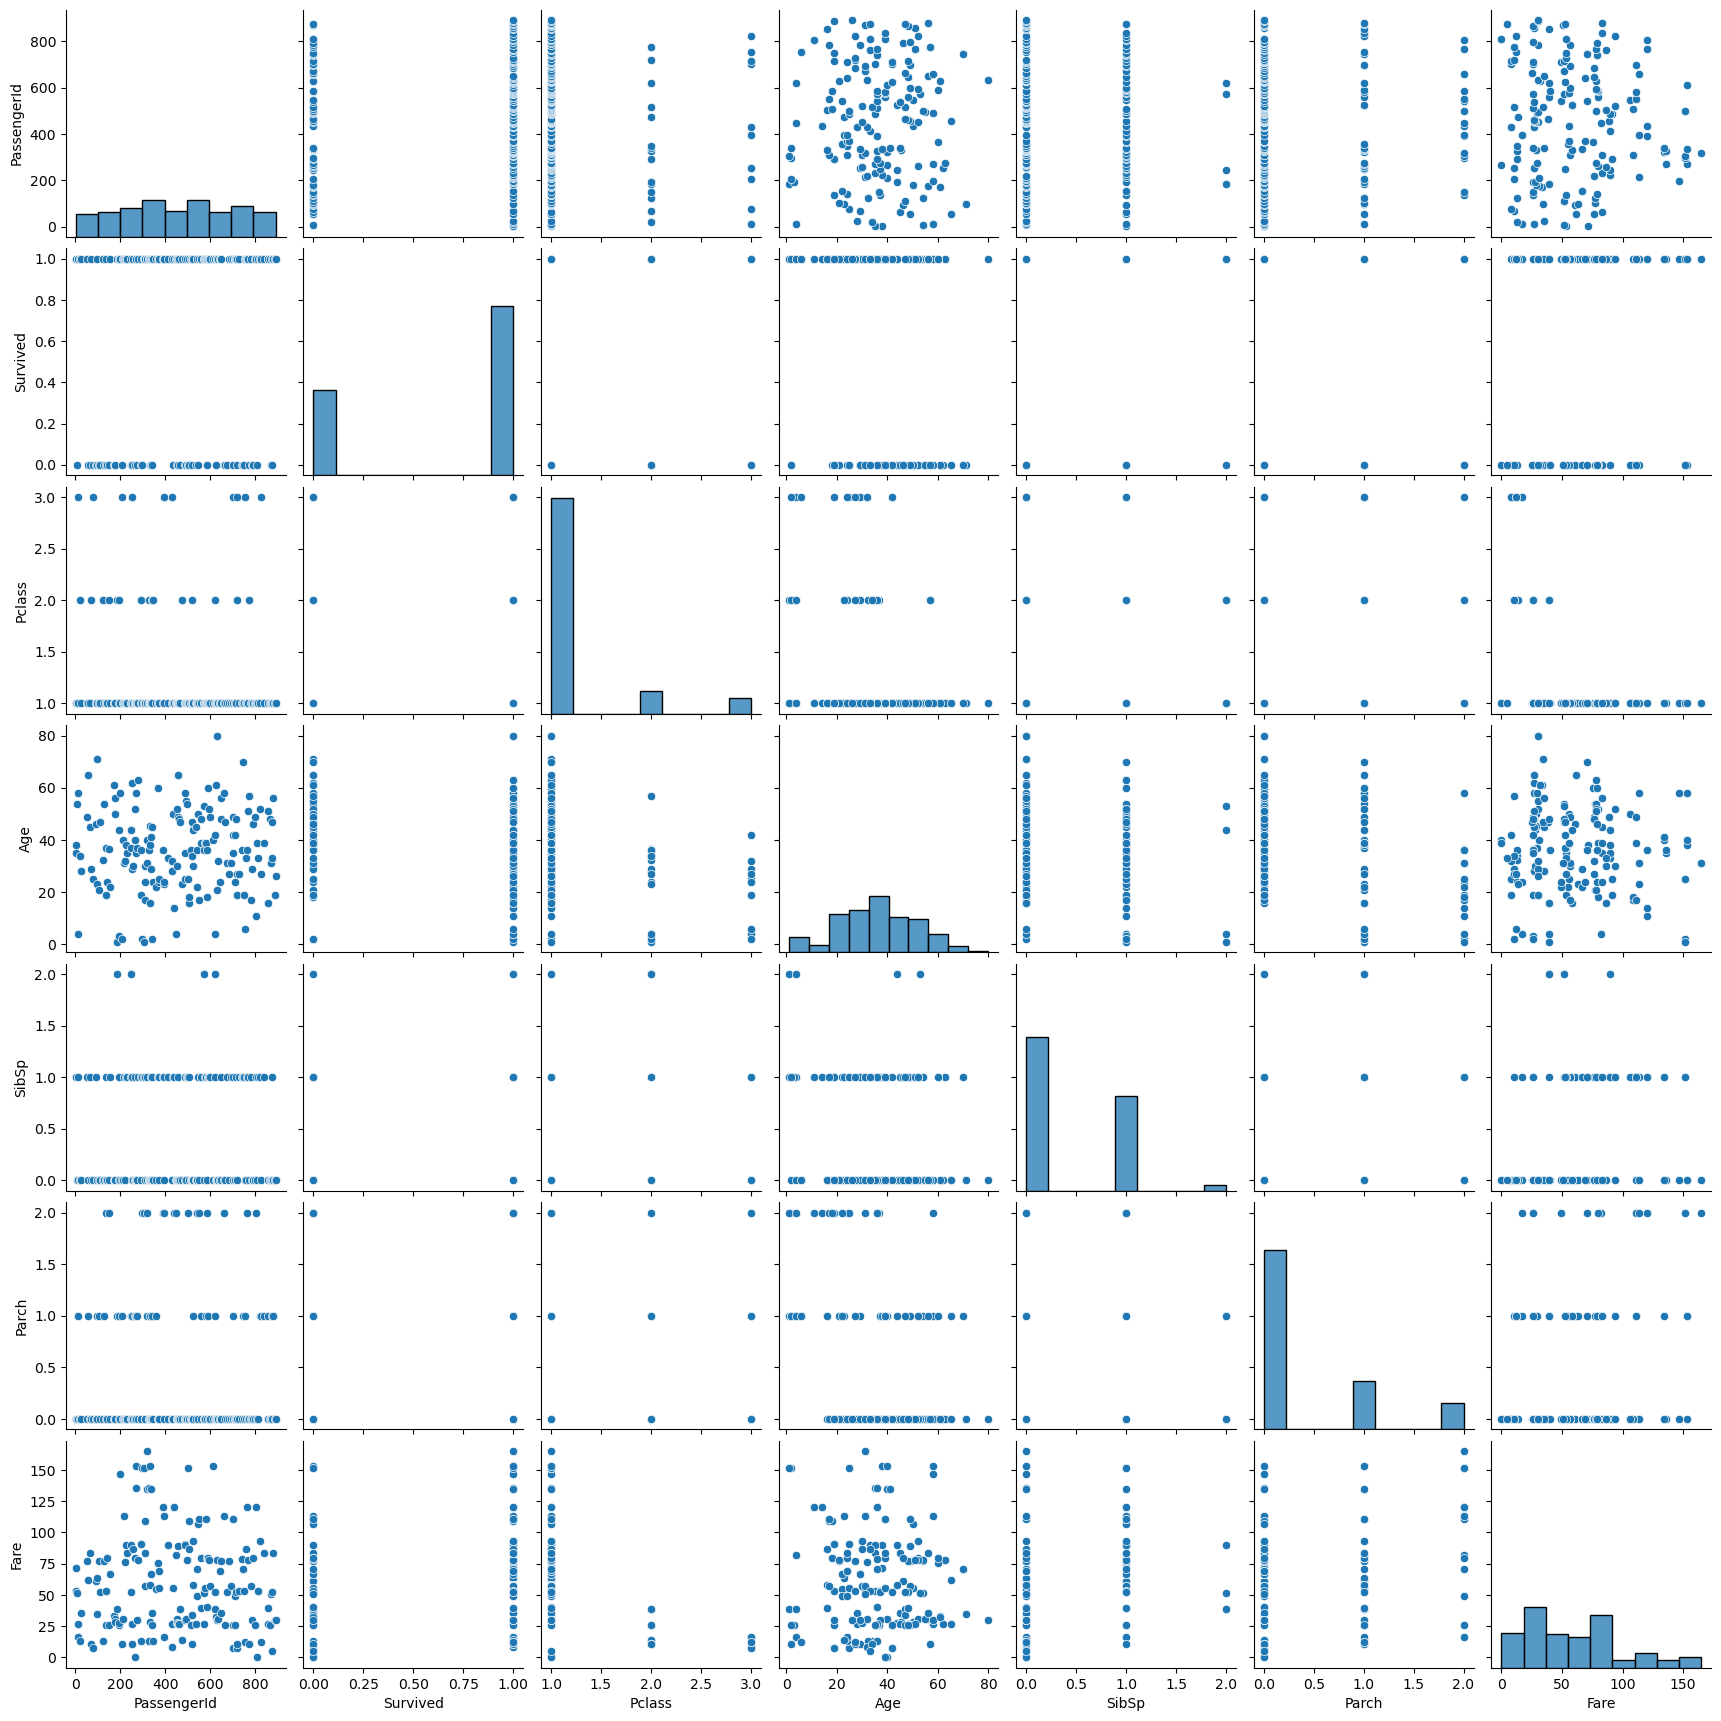

In [82]:
# Pairplot for relationships


 


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame (e.g., Titanic dataset)
# Correlation heatmap for numeric columns only
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.pairplot(numeric_df)

plt.show()



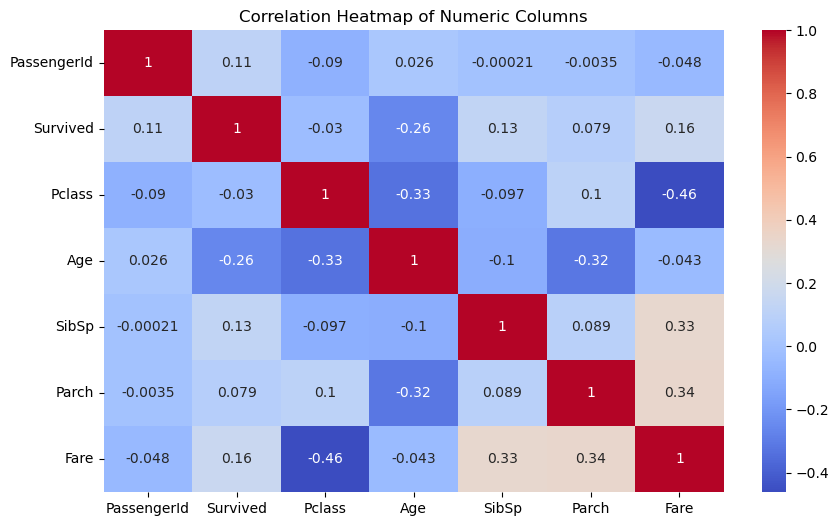

In [84]:
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=['float64', 'int64'])


sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()


In [85]:
import pandas as pd


# Assuming df is the Titanic DataFrame
# Replace df2 with df for consistency
df = df2  # No df2, using df directly

# Display original DataFrame info
print("Original DataFrame:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(df.head(3))
print("\n")

# ✅ Select specific columns
df_subset = df[['Survived', 'Pclass', 'Age']]
print("Subset with specific columns ('Survived', 'Pclass', 'Age'):")
print(f"Shape: {df_subset.shape}")
print(f"Columns: {list(df_subset.columns)}")
print(df_subset.head(3))
print("\n")

# ✅ Select multiple columns by position
df_position = df.iloc[:, [0, 1, 2]]  # First 3 columns
print("Subset with columns by position (indices 0, 1, 2):")
print(f"Shape: {df_position.shape}")
print(f"Columns: {list(df_position.columns)}")
print(df_position.head(3))
print("\n")

# ✅ Select rows based on multiple conditions (e.g., females who survived)
df_female_survivors = df[(df['Survived'] == 1) & (df['Sex'] == 'female')]
print("Subset of female survivors:")
print(f"Shape: {df_female_survivors.shape}")
print(df_female_survivors.head(3))
print("\n")

# ✅ Select rows where Age is not missing
df_no_missing_age = df[df['Age'].notna()]
print("Subset with non-missing Age values:")
print(f"Shape: {df_no_missing_age.shape}")
print(f"Number of rows: {len(df_no_missing_age)}")
print(df_no_missing_age.head(3))
print("\n")

# Select first 3 columns dynamically
df_first_3 = df.iloc[:, :3]
print("Subset with first 3 columns dynamically:")
print(f"Shape: {df_first_3.shape}")
print(f"Columns: {list(df_first_3.columns)}")
print(df_first_3.head(3))
print("\n")

# Select last 3 columns dynamically
df_last_3 = df.iloc[:, -3:]
print("Subset with last 3 columns dynamically:")
print(f"Shape: {df_last_3.shape}")
print(f"Columns: {list(df_last_3.columns)}")
print(df_last_3.head(3))
print("\n")

# Select columns by their dtype (e.g., only numeric columns)
df_numeric = df.select_dtypes(include=['number'])
print("Subset with numeric columns:")
print(f"Shape: {df_numeric.shape}")
print(f"Columns: {list(df_numeric.columns)}")
print(df_numeric.head(3))
print("\n")

# Select columns containing the word "a" (Dynamic selection)
df_a_cols = df.filter(like='a')
print("Subset with columns containing 'a':")
print(f"Shape: {df_a_cols.shape}")
print(f"Columns: {list(df_a_cols.columns)}")
print(df_a_cols.head(3))
print("\n")

# Get column names dynamically & subset using them
columns_list = df.columns[:5]  # First 5 column names
df_subset_dynamic = df[columns_list]
print("Subset with first 5 columns dynamically:")
print(f"Shape: {df_subset_dynamic.shape}")
print(f"Columns: {list(df_subset_dynamic.columns)}")
print(df_subset_dynamic.head(3))
print("\n")

print(">>>>")

Original DataFrame:
Shape: (183, 12)
Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
   PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch    Ticket     Fare Cabin Embarked
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0  PC 17599  71.2833   C85        C
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0    113803  53.1000  C123        S
6            7         0       1                            McCarthy, Mr. Timothy J    male  54.0      0      0     17463  51.8625   E46        S


Subset with specific columns ('Survived', 'Pclass', 'Age'):
Shape: (183, 3)
Columns: ['Survived', 'Pclass', 'Age']
   Survived  Pclass   Age
1         1       1  38.0
3         1       1  35.0
6         0       1  54.0


Subset with columns by positio

In [92]:
### **8. Handling Categorical Variables**
# Find unique values in categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_columns, "\n")


 

# Get unique values for each categorical column
unique_values = {col: df[col].unique() for col in categorical_columns}
print("Sample unique value (first column and first value):", unique_values[categorical_columns[0]][0])

 # 
print("\n Is na sum >  ", df[categorical_columns].isna().sum())

dfSubset=df.loc[~df.duplicated(subset=['Name'])].reset_index(drop=True).copy()
dfSubset.head(1)

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'] 

Sample unique value (first column): Cumings, Mrs. John Bradley (Florence Briggs Thayer)

 Is na sum >   Name        0
Sex         0
Ticket      0
Cabin       0
Embarked    0
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
